In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [8]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

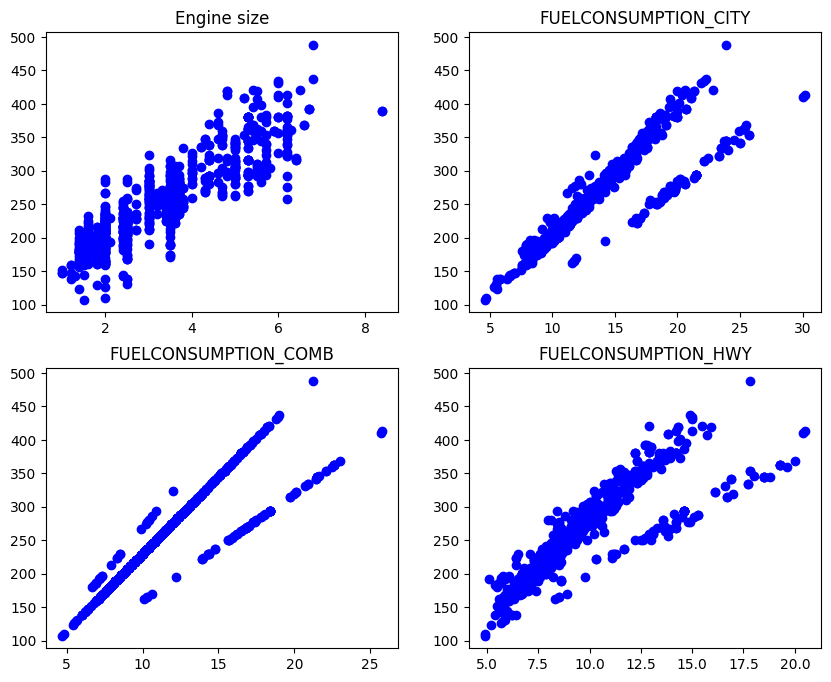

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
axs[0, 0].set_title('Engine size')
axs[0, 1].scatter(train['FUELCONSUMPTION_CITY'], train['CO2EMISSIONS'], color='blue')
axs[0, 1].set_title('FUELCONSUMPTION_CITY')
axs[1, 1].scatter(train['FUELCONSUMPTION_HWY'], train['CO2EMISSIONS'], color='blue')
axs[1, 1].set_title('FUELCONSUMPTION_HWY')
axs[1, 0].scatter(train['FUELCONSUMPTION_COMB'], train['CO2EMISSIONS'], color='blue')
axs[1, 0].set_title('FUELCONSUMPTION_COMB')
plt.show()

In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(x, y)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = reg.predict(test_x)

print('Score: ', reg.score(test_x, test_y))
print('R2_score: ', r2_score(test_y, predict))

Score:  0.8782149613903482
R2_score:  0.8782149613903482
